In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (15, 15)

### Workflow

1. Adjust the size of the logo if required
2. Separate the color and alpha channels from the logo
3. Determine the region of interest (ROI) in the image for logo placement
4. Use logical operations to create ROI and logo masks
5. Use logical operations to combine the ROIs into a watermarked patch
6. Insert the watermark patch in the image

Image size:  (730, 1094, 3)
Logo size:  (2436, 2623, 4)


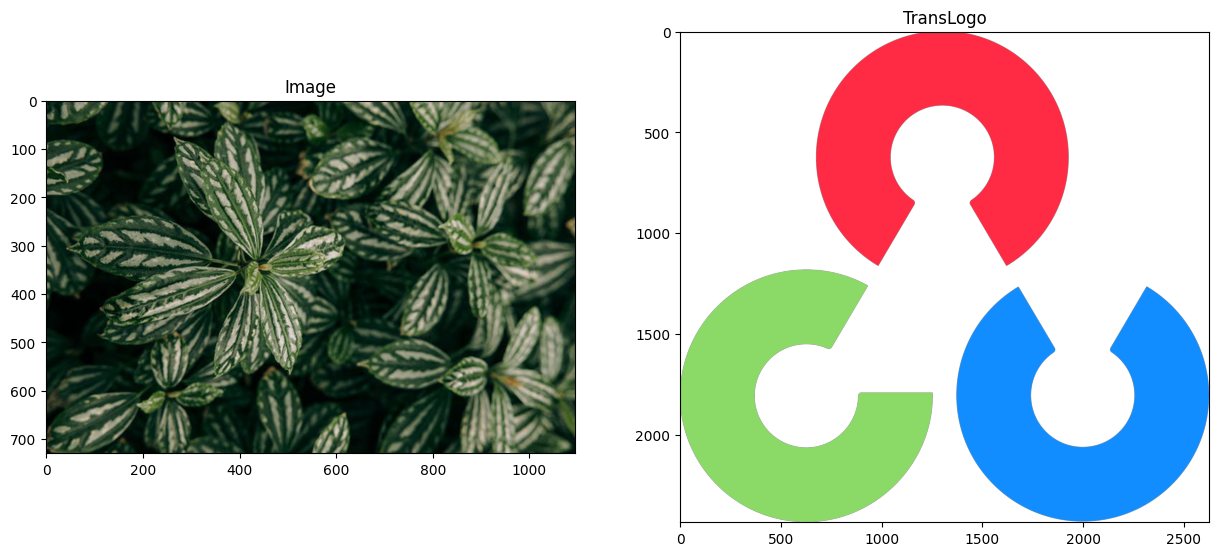

In [3]:
img = cv2.imread('leaves.jpg', cv2.IMREAD_UNCHANGED)
logo = cv2.imread('opencv_logo.png', cv2.IMREAD_UNCHANGED)

print('Image size: ', img.shape)
print('Logo size: ', logo.shape)

logo_rgba = cv2.cvtColor(logo, cv2.COLOR_BGR2RGBA)

plt.figure(figsize=(15,10))
plt.subplot(121); plt.imshow(img[:, :, ::-1]); plt.title('Image');
plt.subplot(122); plt.imshow(logo_rgba);       plt.title('TransLogo');

##### 1. Adjust the size of the logo

In [4]:
logo = cv2.resize(logo, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_LINEAR)

img_h, img_w, _ = img.shape
logo_h, logo_w, _  = logo.shape

print('Resized logo size: ', logo.shape)

Resized logo size:  (244, 262, 4)


##### 2. Separate the color and alpha channels from the logo

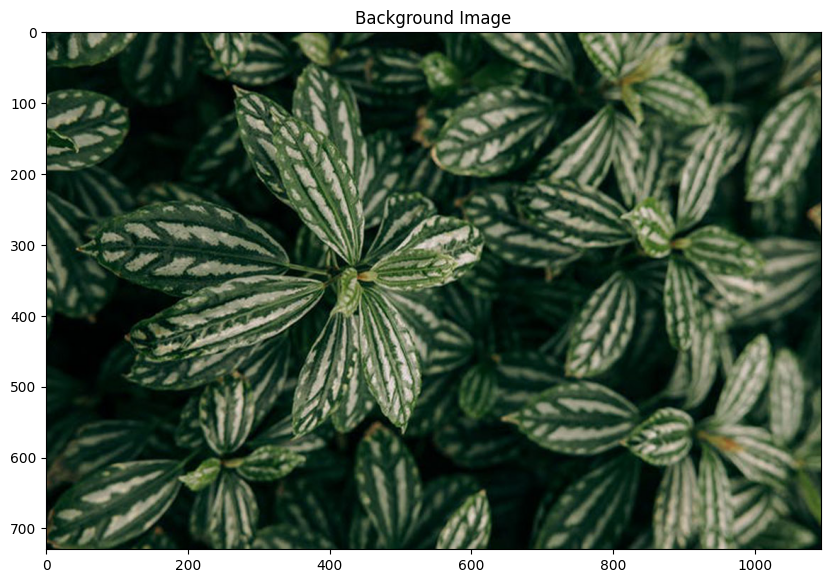

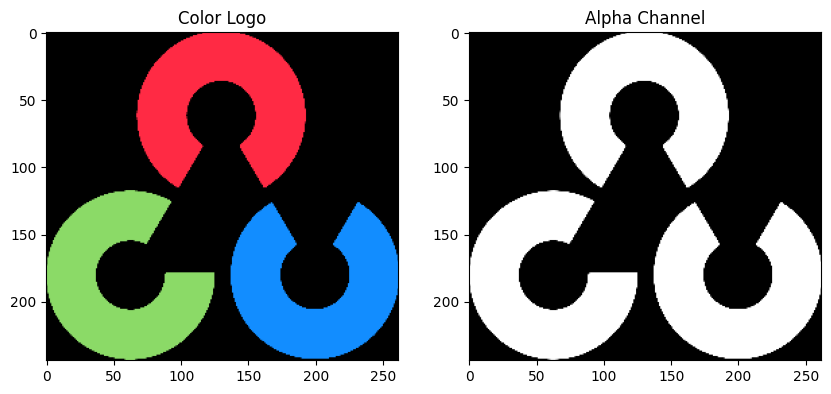

In [5]:
logo_bgr = logo[:, :, 0:3]
logo_alpha = logo[:, :, 3]

plt.figure(figsize = (10, 10))
plt.imshow(img[:, :, ::-1]); plt.title('Background Image');

plt.figure(figsize = (10, 5))
plt.subplot(121); plt.imshow(logo_bgr[:, :, ::-1]);  plt.title('Color Logo');
plt.subplot(122); plt.imshow(logo_alpha);            plt.title('Alpha Channel');

##### 3. Determine the region of interest

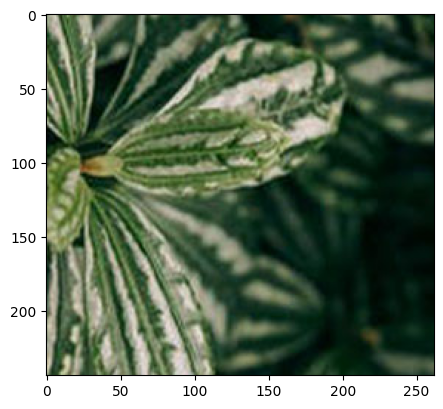

In [6]:
# Cx and Cy are center of the image.
cx = int(img_w/2)
cy = int(img_h/2)

# tlc : top left corner.
tlc_x = int(cx - logo_w/2)
tlc_y = int(cy - logo_h/2)

# brc : bottom right corner.
brc_x = int(cx + logo_w/2)
brc_y = int(cy + logo_h/2)

# Get region of interest from the original image.
roi = img[tlc_y:brc_y, tlc_x:brc_x]

# Display the ROI.
plt.figure(figsize = (5, 5))
plt.imshow(roi[:, :, ::-1]);

##### 4. Use logical operations to create ROI and logo masks

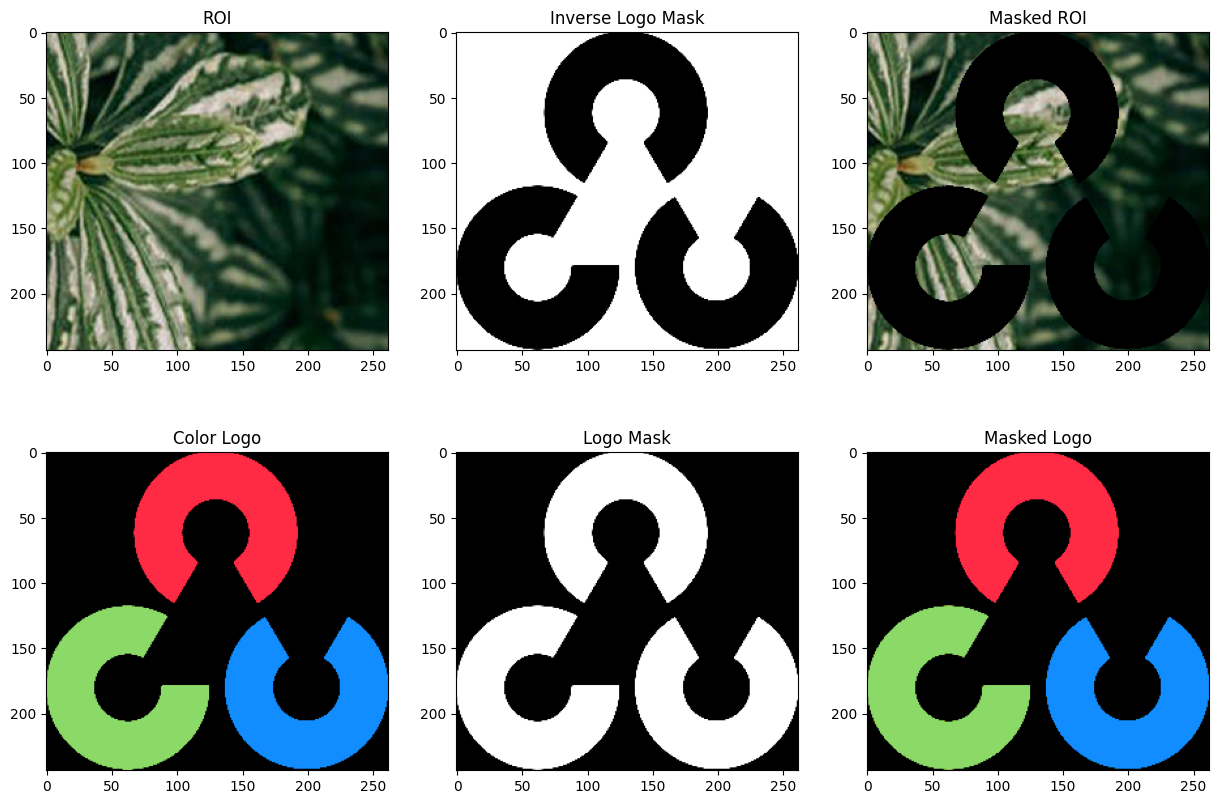

In [7]:
logo_mask = cv2.merge([ logo_alpha, logo_alpha, logo_alpha ])

logo_mask_inv = cv2.bitwise_not(logo_mask)

masked_roi = cv2.bitwise_and(roi, logo_mask_inv)

masked_logo = cv2.bitwise_and(logo_bgr, logo_mask)

plt.figure(figsize = [ 15, 10 ])

plt.subplot(231); plt.imshow(roi[:, :, ::-1]);           plt.title("ROI");
plt.subplot(232); plt.imshow(logo_mask_inv[:, :, ::-1]); plt.title("Inverse Logo Mask");
plt.subplot(233); plt.imshow(masked_roi[:, :, ::-1]);    plt.title("Masked ROI");

plt.subplot(234); plt.imshow(logo_bgr[:, :, ::-1]);      plt.title("Color Logo");
plt.subplot(235); plt.imshow(logo_mask[:, :, ::-1]);     plt.title("Logo Mask");
plt.subplot(236); plt.imshow(masked_logo[:, :, ::-1]);   plt.title("Masked Logo");

##### 5. Use logical operations to combine the ROIs into a watermarked patch

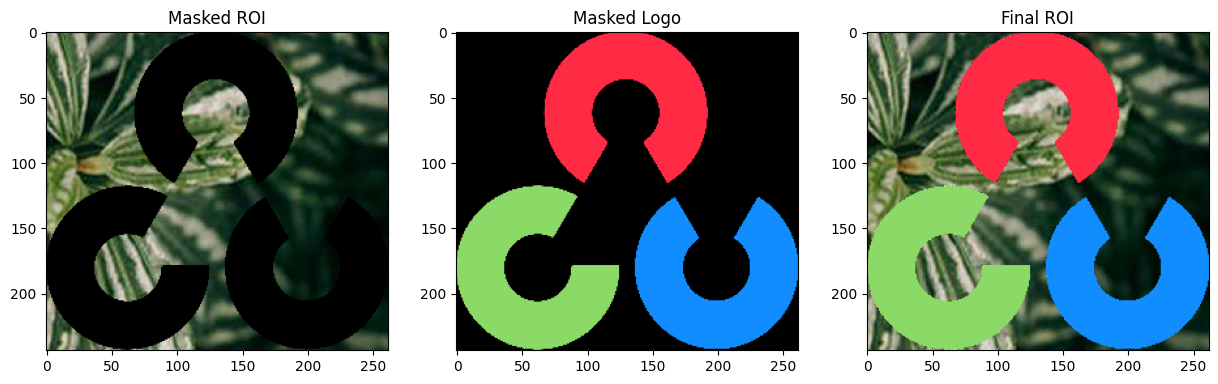

In [8]:
roi_final = cv2.bitwise_or(masked_roi, masked_logo)
plt.figure(figsize = [ 15, 10 ])

plt.subplot(131)

plt.subplot(131); plt.imshow(masked_roi[:,:,::-1]);  plt.title("Masked ROI");
plt.subplot(132); plt.imshow(masked_logo[:,:,::-1]); plt.title("Masked Logo");
plt.subplot(133); plt.imshow(roi_final[:,:,::-1]);   plt.title("Final ROI");

##### 6. Insert the watermark patch in the image 

True

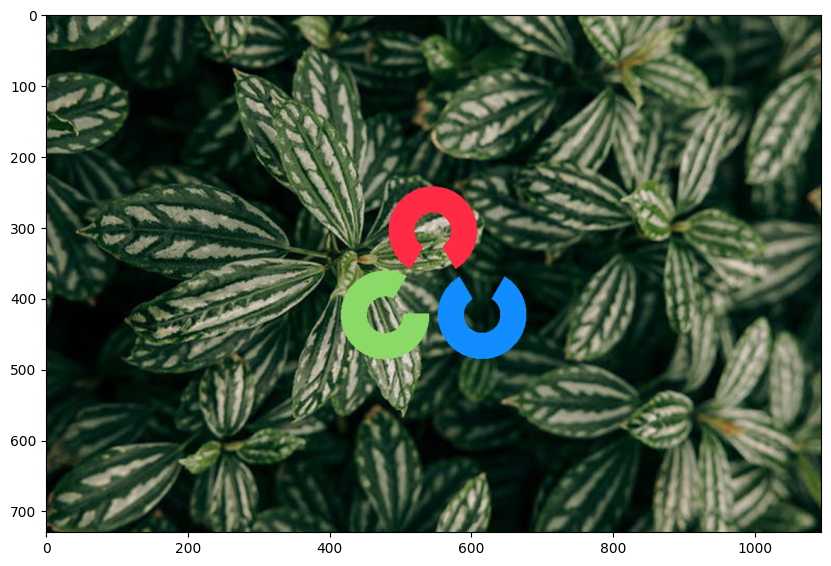

In [9]:
roi_1 = roi.copy()
img_1 = img.copy()

img_1[tlc_y:brc_y, tlc_x:brc_x] = roi_final

plt.figure(figsize = (10, 10))
plt.imshow(img_1[:, :, ::-1])

# Save the final watermarked image.
cv2.imwrite('watermarked_method_1.jpg', img_1)

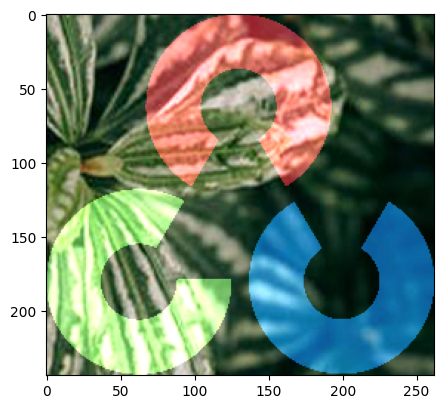

In [10]:
# Make a copy of the ROI.
roi_2 = roi.copy()

# Blend ROI and the logo.
watermarked = cv2.addWeighted(roi_2, 1, logo_bgr, 0.6, 0)

# Display the watermarked ROI.
plt.figure(figsize = (5, 5))
plt.imshow(watermarked[:, :, ::-1]);
